In [1]:
import numpy as np
import ROOT
from math import exp as expo
from math import cos as cosine
from math import sin as sine
sin=np.vectorize(sine)
exp=np.vectorize(expo)
cos=np.vectorize(cosine)
import matplotlib.pylab as plt
from matplotlib.pyplot import figure
from BlindersPy3 import Blinders
from BlindersPy3 import FitType
import scipy.optimize as opt

Welcome to JupyROOT 6.24/06


In [2]:
file = ROOT.TFile.Open("run3NO_4hcopy_ratioFR_perhslice_cov_mat_0.root")
hist_tmp = ROOT.TH1D()
hist_tmp = file.Get("hcalo_ratio_1")

In [4]:
fit_start=30000
fit_stop=300000
fit_range=hist_tmp.FindBin(fit_stop)-hist_tmp.FindBin(fit_start)+1
y_val=np.empty(shape=(6,fit_range))
y_err=np.empty(shape=(6,fit_range))
x_val=np.empty(shape=(6,fit_range))
y_cov=np.empty(shape=(6,fit_range,fit_range))  

In [5]:
%%time
for icalo in range(0,6):
    hist = ROOT.TH1D()
    hcov = ROOT.TH2D()
    hist = file.Get("hcalo_ratio_"+str(icalo+1))
    for ibin in range (0,fit_range):
        y_val[icalo][ibin]=hist.GetBinContent(ibin+hist.FindBin(fit_start))
        y_err[icalo][ibin]=hist.GetBinError(ibin+hist.FindBin(fit_start))
        x_val[icalo][ibin]=hist.GetBinCenter(ibin+hist.FindBin(fit_start))
        
    hcov = file.Get("hcov_"+str(icalo+1))
    for irow in range (0, fit_range):
        for icol in range(0, fit_range):
            y_cov[icalo][irow][icol]=hcov.GetBinContent(irow+hist.FindBin(fit_start),icol+hist.FindBin(fit_start))
            
    hist.Reset()
    hcov.Reset()

CPU times: user 40.7 s, sys: 8.04 s, total: 48.7 s
Wall time: 48.6 s


In [6]:
for icalo in range(0,6):
    mat=np.linalg.eigvalsh(y_cov[icalo])
    for irow in range (0, fit_range):
        if mat[irow]<=0:
            print(icalo,irow,"\n")

In [7]:
getBlinded = Blinders(FitType.Omega_a, "Ritwika's new  Blinding")

 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +
 +                                                                      +
 +           You have chose to blind your fitting according to          +
 +                omega_ref * (1 + (R +/- deltaR) *10^{-6})             +
 +                                                                      +
 + ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ +


In [23]:
T_a_true=4365.411
nbinshift=int((0.5*T_a_true)/hist.GetBinWidth(1))
T_a=2*nbinshift*hist.GetBinWidth(1)

asym=np.empty(6)
dasym=np.empty(6)
rval=np.empty(6)
drval=np.empty(6)
phi=np.empty(6)
dphi=np.empty(6)
A_cbo=np.empty(6)
dA_cbo=np.empty(6)
tau_cbo=np.empty(6)
dtau_cbo=np.empty(6)
omega_cbo=np.empty(6)
domega_cbo=np.empty(6)
phi_cbo=np.empty(6)
dphi_cbo=np.empty(6)
A_vbo_A=np.empty(6)
dA_vbo_A=np.empty(6)
phi_vbo_A=np.empty(6)
dphi_vbo_A=np.empty(6)
A_vbo_phi=np.empty(6)
dA_vbo_phi=np.empty(6)
phi_vbo_phi=np.empty(6)
dphi_vbo_phi=np.empty(6)
A_vw=np.empty(6)
dA_vw=np.empty(6)
tau_vw=np.empty(6)
dtau_vw=np.empty(6)
omega_vw=np.empty(6)
domega_vw=np.empty(6)
phi_vw=np.empty(6)
dphi_vw=np.empty(6)
A_y=np.empty(6)
dA_y=np.empty(6)
tau_y=np.empty(6)
dtau_y=np.empty(6)
omega_y=np.empty(6)
domega_y=np.empty(6)
phi_y=np.empty(6)
dphi_y=np.empty(6)
A_2cbo=np.empty(6)
dA_2cbo=np.empty(6)
tau_2cbo=np.empty(6)
dtau_2cbo=np.empty(6)
omega_2cbo=np.empty(6)
domega_2cbo=np.empty(6)
phi_2cbo=np.empty(6)
dphi_2cbo=np.empty(6)
calonum=np.empty(6)
res=np.empty(shape=(6,fit_range))
fou=np.empty(shape=(6,fit_range))
xfft=np.empty(shape=(6,fit_range))
res2=np.empty(shape=(6,fit_range))
fou2=np.empty(shape=(6,fit_range))
xfft2=np.empty(shape=(6,fit_range))

In [9]:
def fit_func3(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0)-> np.double:
    
    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f - ff - fb)/(2*f + ff + fb) 

In [10]:
def fit_func7(time: np.double,
              asym: np.double = 0.0, 
              R: np.double = 0.0, 
              phi: np.double = 0.0,
              asym_vw = 0.0,
              tau_vw = 0.0,
              omega_vw = 0.0,
              phi_vw = 0.0)-> np.double:
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Nvw - ff*Nvwf - fb*Nvwb)/(2*f*Nvw + ff*Nvwf + fb*Nvwb)

In [11]:
def fit_func11(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0)-> np.double:
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))

    
    return (2*f*Nvw*Nvbo - ff*Nvwf*Nvbof - fb*Nvwb*Nvbob)/(2*f*Nvw*Nvbo + ff*Nvwf*Nvbof + fb*Nvwb*Nvbob)

In [12]:
def fit_func15(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0)-> np.double:
    

    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    

    f=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*time - phi))

    ff=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi))

    fb=(1+ asym*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi))


    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [13]:
def fit_func19(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_vw = 0.0,
               tau_vw = 0.0,
               omega_vw = 0.0,
               phi_vw = 0.0,
               asym_vbo = 0.0,
               tau_vbo=0.0,
               omega_vbo= 0.0,
               phi_vbo=0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_vbo_A = 0.0,
               phi_vbo_A=0.0,
               A_vbo_phi= 0.0,
               phi_vbo_phi=0.0)-> np.double:
    
    
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    
    Avbo=(1+ asym_vbo_A*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_A));
    Avbof=(1+ asym_vbo_A*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_A))
    Avbob=(1+ asym_vbo_A*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_A))
    
    phivbo=(A_vbo_phi*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo_phi))
    phivbof=(A_vbo_phi*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo_phi))
    phivbob=(A_vbo_phi*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo_phi))
   
    

    f=(1+ asym*Avbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phivbo))

    ff=(1+ asym*Avbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phivbof))

    fb=(1+ asym*Avbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phivbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [12]:
def fit_func23(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))


    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo - ff*Ncbof*Nvwf*Nvbof - fb*Ncbob*Nvwb*Nvbob)/(2*f*Ncbo*Nvw*Nvbo + ff*Ncbof*Nvwf*Nvbof + fb*Ncbob*Nvwb*Nvbob)

In [13]:
def fit_func27(time: np.double,
               asym: np.double = 0.0, 
               R: np.double = 0.0, 
               phi: np.double = 0.0,
               asym_cbo = 0.0,
               tau_cbo = 0.0,
               omega_cbo = 0.0,
               phi_cbo = 0.0,
               asym_cbo_A = 0.0,
               phi_cbo_A=0.0,
               A_cbo_phi= 0.0,
               phi_cbo_phi=0.0,
               asym_2cbo= 0.0,
               phi_2cbo = 0.0,
               asym_vw= 0.0,
               phi_vw = 0.0,
               asym_vbo= 0.0,
               phi_vbo = 0.0,
               asym_new= 0.0,
               phi_new = 0.0,)-> np.double:
    
    tau_vw = 75360
    omega_vw = 0.01389
    
    tau_vbo = 5500
    omega_vbo = 0.0140986
    
    tau_new = 28000
    omega_new = 0.01428

    
    Ncbo=(1 + asym_cbo*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo))
    Ncbof=(1+ asym_cbo*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo))
    Ncbob=(1+ asym_cbo*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo))
    Acbo=(1+ asym_cbo_A*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_A));
    Acbof=(1+ asym_cbo_A*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_A))
    Acbob=(1+ asym_cbo_A*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_A))
    phicbo=(A_cbo_phi*exp(-time/tau_cbo)*cos(omega_cbo*time - phi_cbo_phi))
    phicbof=(A_cbo_phi*exp(-(time + T_a/2)/tau_cbo)*cos(omega_cbo*(time + T_a/2) - phi_cbo_phi))
    phicbob=(A_cbo_phi*exp(-(time - T_a/2)/tau_cbo)*cos(omega_cbo*(time - T_a/2) - phi_cbo_phi))
    N2cbo=(asym_2cbo*exp(-time/(tau_cbo/2))*cos(2*omega_cbo*time - phi_2cbo))
    N2cbof=(asym_2cbo*exp(-(time + T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time + T_a/2) - phi_2cbo))
    N2cbob=(asym_2cbo*exp(-(time - T_a/2)/(tau_cbo/2))*cos(2*omega_cbo*(time - T_a/2) - phi_2cbo))
    Nvw=(1+ asym_vw*exp(-time/tau_vw)*cos(omega_vw*time - phi_vw))
    Nvwf=(1+ asym_vw*exp(-(time + T_a/2)/tau_vw)*cos(omega_vw*(time + T_a/2) - phi_vw))
    Nvwb=(1+ asym_vw*exp(-(time - T_a/2)/tau_vw)*cos(omega_vw*(time - T_a/2) - phi_vw))
    Nvbo=(1+ asym_vbo*exp(-time/tau_vbo)*cos(omega_vbo*time - phi_vbo))
    Nvbof=(1+ asym_vbo*exp(-(time + T_a/2)/tau_vbo)*cos(omega_vbo*(time + T_a/2) - phi_vbo))
    Nvbob=(1+ asym_vbo*exp(-(time - T_a/2)/tau_vbo)*cos(omega_vbo*(time - T_a/2) - phi_vbo))
    Nnew=(1+ asym_new*exp(-time/tau_new)*cos(omega_new*time - phi_new))
    Nnewf=(1+ asym_new*exp(-(time + T_a/2)/tau_new)*cos(omega_new*(time + T_a/2) - phi_new))
    Nnewb=(1+ asym_new*exp(-(time - T_a/2)/tau_new)*cos(omega_new*(time - T_a/2) - phi_new))



    
    Ncbo=Ncbo+N2cbo
    Ncbof=Ncbof+N2cbof
    Ncbob=Ncbob+N2cbob

    f=(1+ asym*Acbo*cos((getBlinded.paramToFreq(R)/1000.)*time - phi - phicbo))

    ff=(1+ asym*Acbof*cos((getBlinded.paramToFreq(R)/1000.)*(time + T_a/2) - phi - phicbof))

    fb=(1+ asym*Acbob*cos((getBlinded.paramToFreq(R)/1000.)*(time - T_a/2) - phi - phicbob))

    
    return (2*f*Ncbo*Nvw*Nvbo*Nnew - ff*Ncbof*Nvwf*Nvbof*Nnewf - fb*Ncbob*Nvwb*Nvbob*Nnewb)/(2*f*Ncbo*Nvw*Nvbo*Nnew + ff*Ncbof*Nvwf*Nvbof*Nnewf + fb*Ncbob*Nvwb*Nvbob*Nnewb)

In [14]:
p_init3=[2.28839e-01,
        0.000000,
        4.02055e+00]

In [15]:
%%time
for icalo in range(0,6): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init_final=pars3
    
    pars2, cov_final = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init_final, sigma=y_cov[icalo])
    
    stdevs=np.sqrt(np.diag(cov_final))
    
    res[icalo] = (y_val[icalo] - fit_func3(x_val[icalo], *pars2))/y_err[icalo]
    fou[icalo]=abs(np.fft.fft(res[icalo]))
    xfft[icalo]= np.linspace(0,6.667,num=1801)
    
    calonum[icalo]=icalo+1
    
    asym[icalo]=pars2[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars2[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars2[2]
    dphi[icalo]=stdevs[2]

CPU times: user 4.49 s, sys: 3.41 s, total: 7.9 s
Wall time: 1.09 s


(0.0, 3.3335)

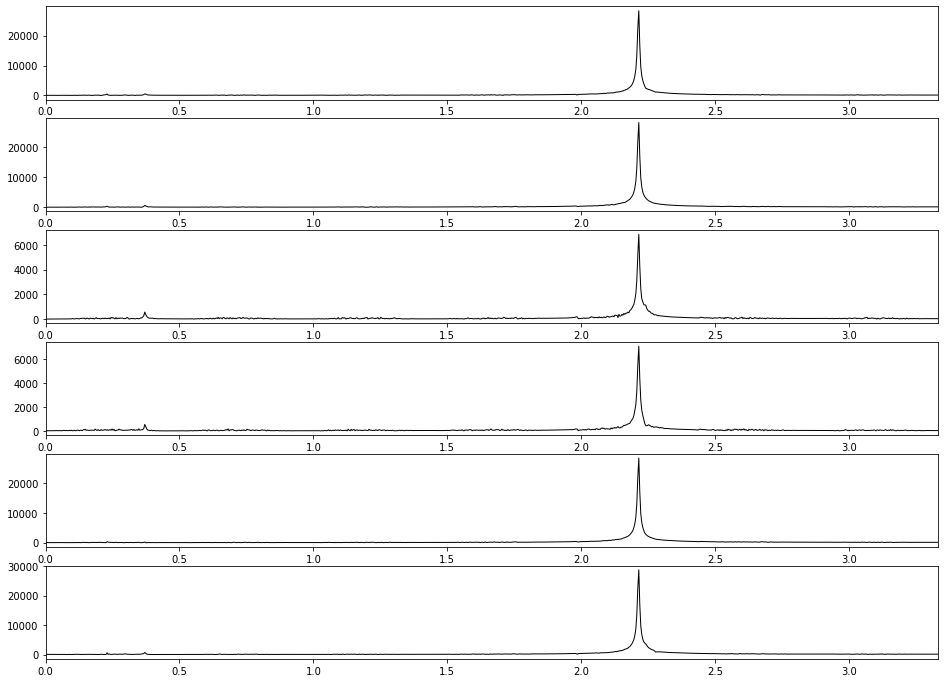

In [16]:
plt.figure(figsize=(16,12))
# fist line:
plt.subplot(611)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[0], fou[0], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)

 
# second line
plt.subplot(612)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[1], fou[1], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(613)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[2], fou[2], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(614)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[3], fou[3], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(615)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[4], fou[4], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(616)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft[5], fou[5], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=0, right=6.667/2)
#plt.ylim(-10,4000)





In [55]:
%%time
for icalo in range(0,6): 
    pars3, cov3 = opt.curve_fit(f=fit_func3, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init3, sigma=y_err[icalo]) 
    
    p_init7=[pars3[0],
             pars3[1],
             pars3[2],
             0.04,
             60000,
             0.01389,
             3.6]
    
    pars7, cov7 = opt.curve_fit(f=fit_func7, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init7, sigma=y_err[icalo])
    
    p_init11=[pars7[0],
              pars7[1],
              pars7[2],
              pars7[3],
              pars7[4],
              pars7[5],
              pars7[6],
              0.06,
              23000,
              0.01407,
              1.5]
    
    pars11, cov11 = opt.curve_fit(f=fit_func11, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init11, sigma=y_err[icalo])

    p_init15=[pars11[0],
              pars11[1],
              pars11[2],
              pars11[3],
              pars11[4],
              pars11[5],
              pars11[6],
              pars11[7],
              pars11[8],
              pars11[9],
              pars11[10],
              0.02,
              225000,
              0.002332,
              2.5]
    
    pars15, cov15 = opt.curve_fit(f=fit_func15, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init15, sigma=y_err[icalo])
    
    p_init19=[pars15[0],
              pars15[1],
              pars15[2],
              pars15[3],
              pars15[4],
              pars15[5],
              pars15[6],
              pars15[7],
              pars15[8],
              pars15[9],
              pars15[10],
              pars15[11],
              pars15[12],
              pars15[13],
              pars15[14],
              0.008,
              1.15,
              0.01,
              3.1]
    
    pars19, cov19 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=p_init19, sigma=y_err[icalo])
    
    pars_final, cov2 = opt.curve_fit(f=fit_func19, xdata=x_val[icalo], ydata=y_val[icalo], p0=pars19, sigma=y_cov[icalo])
    
    stdevs=np.sqrt(np.diag(cov2))
    
    asym[icalo]=pars_final[0]
    dasym[icalo]=stdevs[0]
    rval[icalo]=pars_final[1]
    drval[icalo]=stdevs[1]
    phi[icalo]=pars_final[2]
    dphi[icalo]=stdevs[2]
    A_y[icalo]=pars_final[3]
    dA_y[icalo]=stdevs[3]
    tau_y[icalo]=pars_final[4]
    dtau_y[icalo]=stdevs[4]
    omega_y[icalo]=pars_final[5]
    domega_y[icalo]=stdevs[5]
    phi_y[icalo]=pars_final[6]
    dphi_y[icalo]=stdevs[6]
    A_vw[icalo]=pars_final[7]
    dA_vw[icalo]=stdevs[7]
    tau_vw[icalo]=pars_final[8]
    dtau_vw[icalo]=stdevs[8]
    omega_vw[icalo]=pars_final[9]
    domega_vw[icalo]=stdevs[9]
    phi_vw[icalo]=pars_final[10]
    dphi_vw[icalo]=stdevs[10]
    A_cbo[icalo]=pars_final[11]
    dA_cbo[icalo]=stdevs[11]
    tau_cbo[icalo]=pars_final[12]
    dtau_cbo[icalo]=stdevs[12]
    omega_cbo[icalo]=pars_final[13]
    domega_cbo[icalo]=stdevs[13]
    phi_cbo[icalo]=pars_final[14]
    dphi_cbo[icalo]=stdevs[14]
    A_vbo_A[icalo]=pars_final[15]
    dA_vbo_A[icalo]=stdevs[15]
    phi_vbo_A[icalo]=pars_final[16]
    dphi_vbo_A[icalo]=stdevs[16]
    A_vbo_phi[icalo]=pars_final[17]
    dA_vbo_phi[icalo]=stdevs[17]
    phi_vbo_phi[icalo]=pars_final[18]
    dphi_vbo_phi[icalo]=stdevs[18]
    
    res2[icalo] = (y_val[icalo] - fit_func19(x_val[icalo], *pars_final))/y_err[icalo]
    fou2[icalo]=abs(np.fft.fft(res2[icalo]))
    xfft2[icalo]= np.linspace(0,6.667,num=1801)
    
    calonum[icalo]=icalo+1

CPU times: user 53.5 s, sys: 6.67 s, total: 1min
Wall time: 47.1 s


In [56]:
pars_final

array([ 2.02383563e-01, -3.65319936e+01,  3.82812224e+00,  4.74516823e-02,
        1.46938370e+05,  1.39120754e-02,  6.77863397e+00,  5.83180617e-02,
        7.26986700e+04,  1.38883936e-02, -1.00415121e+00, -2.47598376e-03,
        3.94160216e+05,  2.33238410e-03,  2.31230879e+00,  8.11418156e-03,
        4.29873482e+00, -1.46109377e-02,  3.15002255e+00])

In [57]:
stdevs

array([1.04577592e-04, 6.62586714e+00, 9.96090244e-04, 1.96042259e-03,
       6.36522823e+03, 2.87884209e-07, 3.90156836e-02, 2.62448575e-03,
       2.59632009e+03, 5.15298585e-07, 4.47855776e-02, 2.57943555e-04,
       1.82410429e+05, 1.17613088e-06, 1.04504980e-01, 1.54520556e-03,
       1.92003249e-01, 1.56511944e-03, 1.06872850e-01])

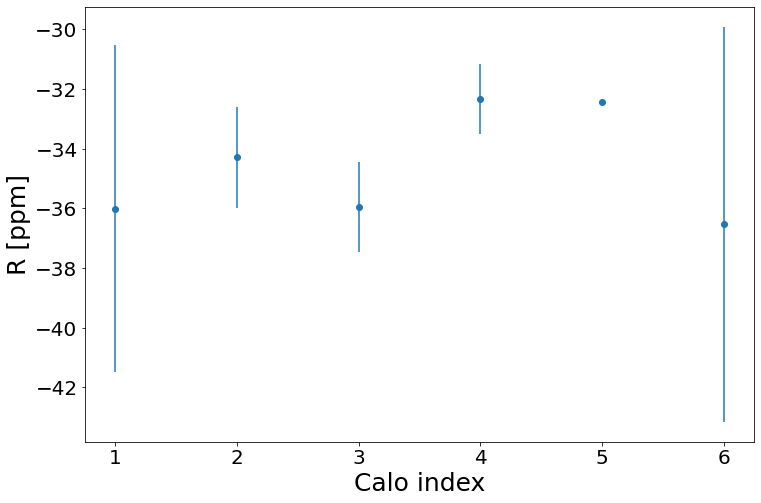

In [59]:
plt.figure(figsize=(12,8))
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, rval, yerr=drval, fmt="o")
plt.xlabel('Calo index',fontsize=25)
plt.ylabel('R [ppm]',fontsize=25)
plt.show()
#plt.savefig('run3NO_caloscan_R.jpg')

(2.1, 2.4)

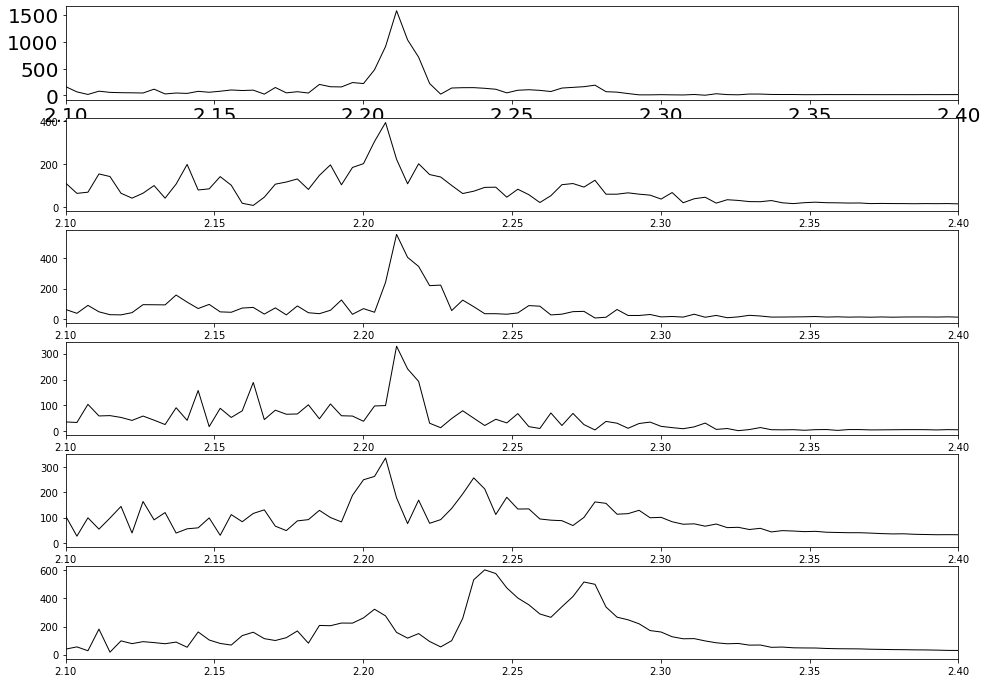

In [60]:
plt.figure(figsize=(16,12))
# fist line:
plt.subplot(611)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[0], fou2[0], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=2.1, right=2.4)
#plt.ylim(-10,4000)

 
# second line
plt.subplot(612)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[1], fou2[1], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=2.1, right=2.4)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(613)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[2], fou2[2], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=2.1, right=2.4)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(614)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[3], fou2[3], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=2.1, right=2.4)
#plt.ylim(-10,4000)

# fist line:
plt.subplot(615)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[4], fou2[4], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=2.1, right=2.4)
#plt.ylim(-10,4000)
 
# second line
plt.subplot(616)
plt.rc('xtick', labelsize=10) 
plt.rc('ytick', labelsize=10) 
plt.plot(xfft2[5], fou2[5], linestyle='solid', linewidth=1, color='black')
plt.xlim(left=2.1, right=2.4)
#plt.ylim(-10,4000)





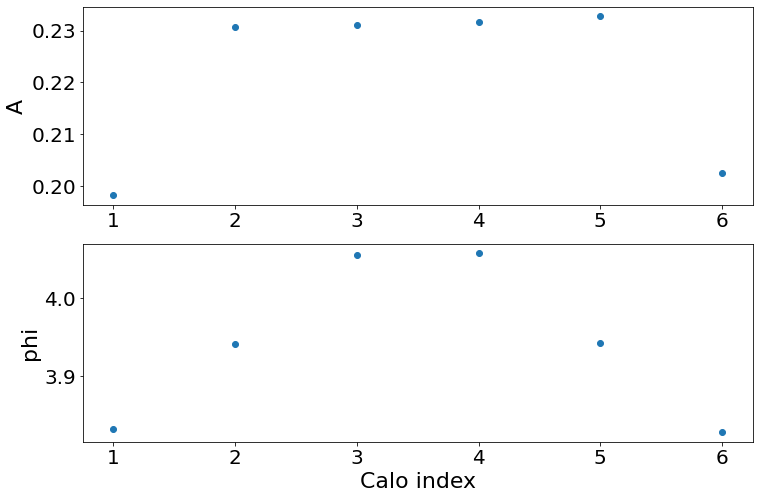

In [62]:
plt.figure(figsize=(12,8))
# fist line:
plt.subplot(211)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, asym, yerr=dasym, fmt="o")
plt.ylabel('A',fontsize=22)
 
# second line
plt.subplot(212)
plt.rc('xtick', labelsize=20) 
plt.rc('ytick', labelsize=20) 
plt.errorbar(calonum, phi, yerr=dphi, fmt="o")
plt.xlabel('Calo index',fontsize=22)
plt.ylabel('phi',fontsize=22)

plt.show()
#plt.savefig('run3NO_caloscan_A_phi.jpg')